In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Train_Data.csv'
)

test_data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Test_Data.csv'
)

Mounted at /content/drive


In [4]:
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

train_data.head()


Train shape: (3630, 7)
Test shape: (492, 6)


,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [5]:
data = train_data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
data.describe()


,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()


,0
age,0
sex,0
bmi,0
smoker,0
region,0
children,0
charges,0


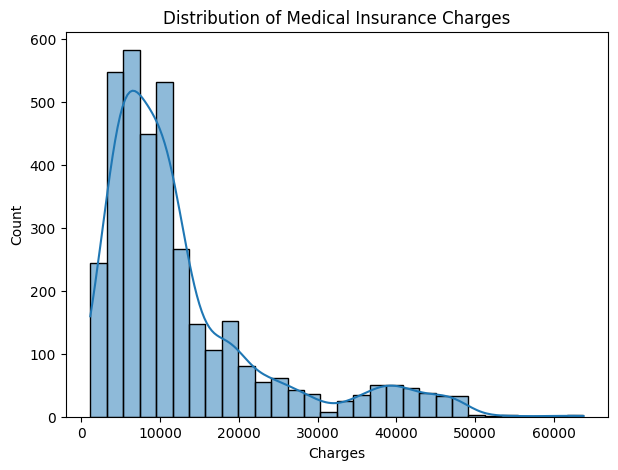

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.show()

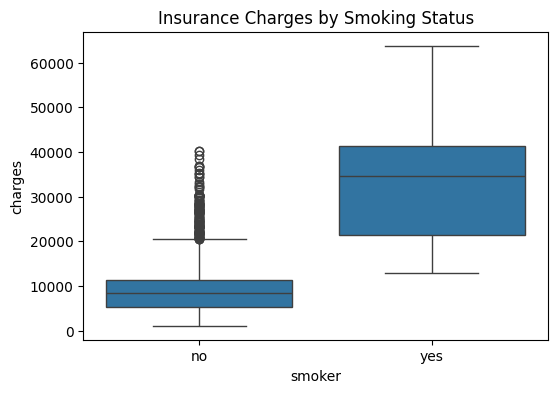

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges by Smoking Status')
plt.show()

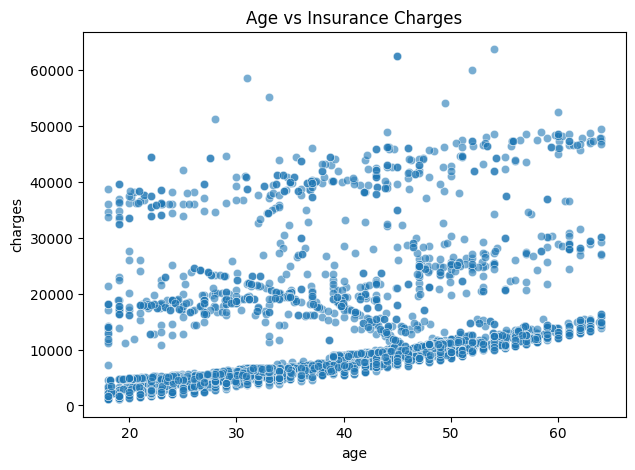

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges', data=data, alpha=0.6)
plt.title('Age vs Insurance Charges')
plt.show()

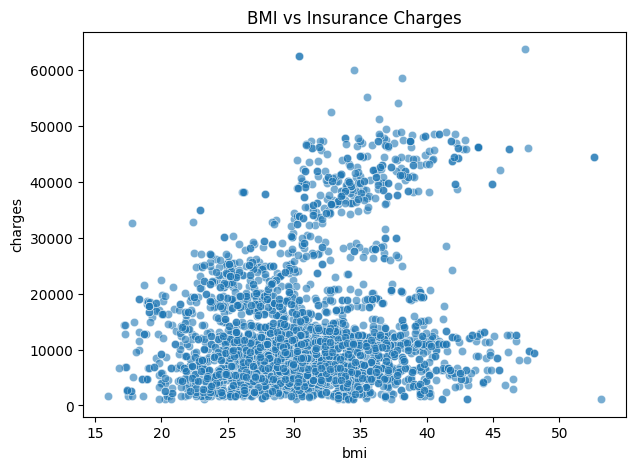

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi', y='charges', data=data, alpha=0.6)
plt.title('BMI vs Insurance Charges')
plt.show()

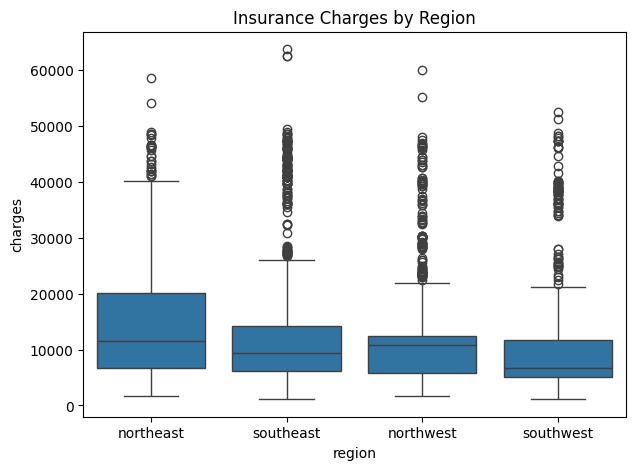

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Charges by Region')
plt.show()

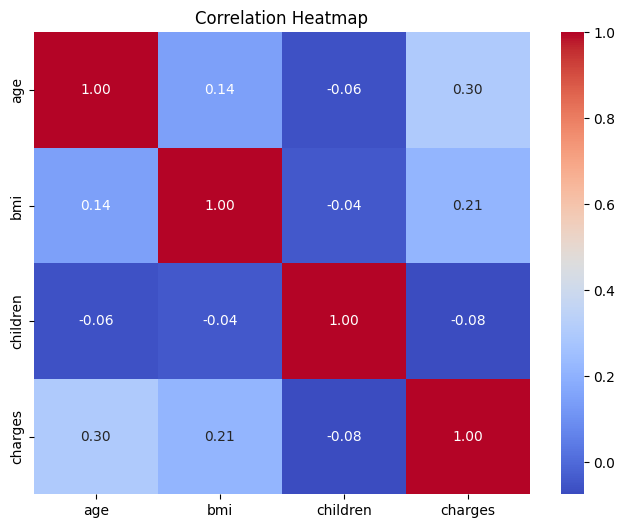

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data[['age','bmi','children','charges']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
data['age_group'] = pd.cut(
    data['age'],
    bins=[17, 30, 45, 60, 100],
    labels=['Young Adult', 'Adult', 'Middle Aged', 'Senior']
)

In [16]:
data['bmi_category'] = pd.cut(
    data['bmi'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [17]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [18]:
data = pd.get_dummies(
    data,
    columns=['region', 'age_group', 'bmi_category'],
    drop_first=True
)

In [19]:
X = data.drop(columns='charges')
y = data['charges']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [21]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
X_train.head()

X_train shape: (2904, 14)
X_val shape: (726, 14)


,age,sex,bmi,smoker,children,region_northwest,region_southeast,region_southwest,age_group_Adult,age_group_Middle Aged,age_group_Senior,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
929,22.250446,1,26.053817,0,5,False,False,True,False,False,False,False,True,False
3587,52.000000,1,32.708144,0,3,False,False,True,False,True,False,False,False,True
3586,21.000000,1,25.700000,1,4,False,False,True,False,False,False,False,True,False
2344,44.905618,0,33.651275,0,1,False,False,True,True,False,False,False,False,True
1352,41.903118,1,26.143243,1,1,False,False,False,True,False,False,False,True,False


In [23]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)

    return mae, rmse, r2

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_mae, lr_rmse, lr_r2 = evaluate_model(lr, X_train, X_val, y_train, y_val)

print("Linear Regression")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2:", lr_r2)

Linear Regression
MAE: 3805.418525785964
RMSE: 5618.157315993176
R2: 0.7260420257151765


In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge_mae, ridge_rmse, ridge_r2 = evaluate_model(ridge, X_train, X_val, y_train, y_val)

print("Ridge Regression")
print("MAE:", ridge_mae)
print("RMSE:", ridge_rmse)
print("R2:", ridge_r2)


Ridge Regression
MAE: 3806.289462768247
RMSE: 5617.706558739829
R2: 0.7260859844664879


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf_mae, rf_rmse, rf_r2 = evaluate_model(rf, X_train, X_val, y_train, y_val)

print("Random Forest")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)


Random Forest
MAE: 1615.2971975012047
RMSE: 3396.6024625596187
R2: 0.8998650708669228


In [27]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'MAE': [lr_mae, ridge_mae, rf_mae],
    'RMSE': [lr_rmse, ridge_rmse, rf_rmse],
    'R2 Score': [lr_r2, ridge_r2, rf_r2]
})

results

,Model,MAE,RMSE,R2 Score
0,Linear Regression,3805.418526,5618.157316,0.726042
1,Ridge Regression,3806.289463,5617.706559,0.726086
2,Random Forest,1615.297198,3396.602463,0.899865


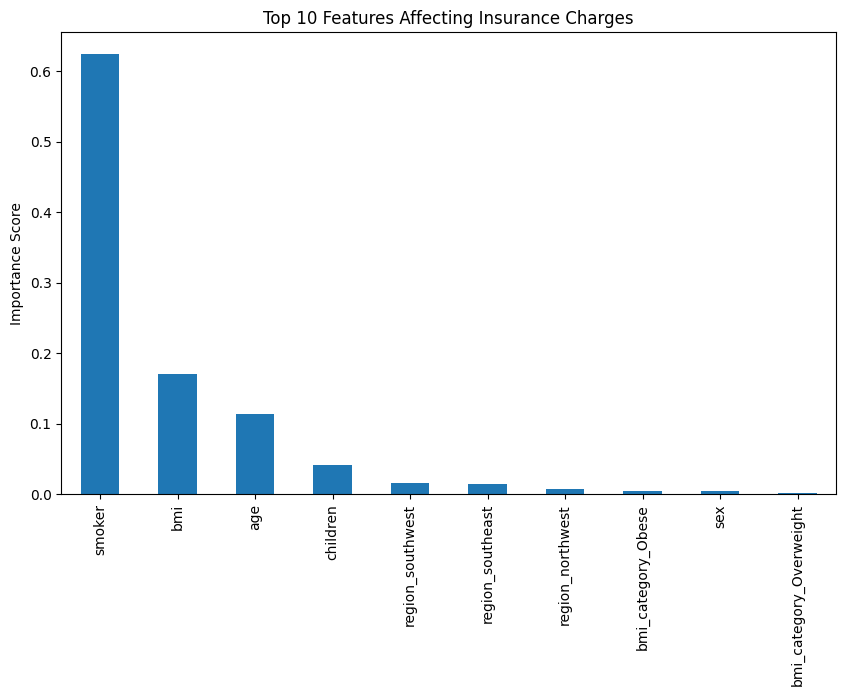

In [29]:
final_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

final_model.fit(X_train, y_train)

feature_importance = pd.Series(
    final_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features Affecting Insurance Charges')
plt.ylabel('Importance Score')
plt.show()

In [30]:
test = test_data.copy()

# Age group
test['age_group'] = pd.cut(
    test['age'],
    bins=[17, 30, 45, 60, 100],
    labels=['Young Adult', 'Adult', 'Middle Aged', 'Senior']
)

# BMI category
test['bmi_category'] = pd.cut(
    test['bmi'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# Binary encoding
test['sex'] = test['sex'].map({'male': 1, 'female': 0})
test['smoker'] = test['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding
test = pd.get_dummies(
    test,
    columns=['region', 'age_group', 'bmi_category'],
    drop_first=True
)

# Align columns with training data
test = test.reindex(columns=X_train.columns, fill_value=0)


In [31]:
test_predictions = final_model.predict(test)

test['predicted_charges'] = test_predictions
test.head()

,age,sex,bmi,smoker,children,region_northwest,region_southeast,region_southwest,age_group_Adult,age_group_Middle Aged,age_group_Senior,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,predicted_charges
0,40.000000,1,29.900000,0,2,False,False,True,True,False,False,False,True,False,7190.542371
1,47.000000,1,32.300000,0,1,False,False,True,False,True,False,False,False,True,9806.703969
2,54.000000,0,28.880000,0,2,False,False,False,False,True,False,False,True,False,12442.524492
3,37.000000,1,30.568094,0,3,False,False,False,True,False,False,False,False,True,6896.121700
4,59.130049,1,33.132854,1,4,False,False,False,False,True,False,False,False,True,41946.788436


In [32]:
import joblib

joblib.dump(final_model, 'medical_insurance_cost_model.pkl')

['medical_insurance_cost_model.pkl']